## Table of contents
### 1) Introduction
Dataset, features and target value
Problem description
### 2) Descriptive analysis and EDA (Exploratory Data Analysis)
Churn rate and Correlation between features
Profile of Churn vs Existing customers
Tenure and Monthly charges distribution
### 3) Cluster analysis
Churn cluster detection
Churn customer cluster analysis – by Demographic, Account type and Service Usage
### 4) Churn customer prediction model
Prediction model process
Model evaluation
### 5) Retention plan

# 1)Introduction
## Dataset, Features and Target value
Source : https://www.kaggle.com/blastchar/telco-customer-churn ( IBM Sample dataset)

Here, IBM provided customer data for Telecom industry to predict churn customer based on demographic, usage and account based information. Main objective here is to analyze churn customers’ behavior and develop strategies to increase customer retention. Assumption — Here, data source has not provided any information related to time; So I have assumed that all the records are specific to the particular month.

## Dataset has information related to,

### Demographic:
* Gender - Male / Female
* Age range - In terms of Partner, Dependent and Senior Citizen
### Services:
* Phone service - If customer has Phone service, then services related to Phone like;
* Multiline Phone service
* Internet Service - If customer has Internet service, then services related to Internet like;
Online security
Online backup
Device protection
Tech support
Streaming TV
Streaming Movies
### Account type:
* Tenure - How long customer is with the company?
* Contract type - What kind of contract they have with a company? Like
    ** Monthly bases
    ** On going bases - If on going bases, then One month contract or Two year contract
* Paperless billing - Customer is paperless billion option or not?
* Payment method - What kind of payment method customer has?
** Mailed check
** Electronic check
** Credit card (Automatic)
** Bank transfer (Automatic)
### Usage:
* Monthly charges
* Total charges
### Target:
* Churn - Whether customer left the company or still with the company?
## Problem Description
Why customers leaving the company?
The reasons behind the customer leaving company could be

* High charges
* Better offer from competitor
* Poor customer service
* Some unknown reasons
  
How to detect the churn customer?
* Monitoring usage
* Analysing complains
* Analyzing competitors offers
  
How to prevent customers from leaving a company?

Once you detect high risk customers, apply

* Retention plans
* Improve customer service



# 2) Descriptive analysis and EDA (Exploratory Data Analysis)
Here, I have explored data, features and tried to have some intuition about them.

# load libraries and dataset 

In [1]:
import pandas as pd 
import numpy as np 
import math as math
import random 
from sklearn.utils import shuffle
import sklearn.preprocessing as prepro
from sklearn.model_selection import train_test_split ,cross_val_predict ,GridSearchCV ,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier 
from sklearn.utils import resample
from sklearn.cluster import  KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines


random_state = 42 
plotColor= ['g','b','r','m','c','y']
markers = ['+','o','*','^','v','>','<']

# set up

sns.set(style='whitegrid')
%matplotlib inline




In [2]:
# Create Data class which has load_data method
class Data:
    def __init__(self):
        print("Data object initiated")
    
    def Load_data(self,filepath,format='csv'):
        """ Read data from file and return data """
        if format == 'csv':
            return pd.read_csv(filepath)
        elif format == 'xlsx':
            return pd.read_excel(filepath)

In [3]:
data_file = '../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
extension = 'csv'

data = Data()
df_raw = data.Load_data(data_file, extension)
df_raw.head(10)

Data object initiated


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Dimensionality & Sanity check

In [4]:
df_raw.shape

(7043, 21)

the dataset has 7043 observations and 21 features (columns)

In [5]:
# features exploration 
df_raw.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# checking for null values 

df_raw.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# checking for dublicated values 
df_raw.duplicated().any()

np.False_

In [8]:
#exploring features datatypes 
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We need to rename columns into proper format and need to transform columns like Partner, Dependents and so on to similar format for furture analysis.

Also, need to change data type of TotalCharges to float

### Data transformation & Renaming


Here, we are going to rename some columns as well as modifying records with proper format for further analysis.

Check columns with empty or whitespace strings

In [9]:
def empty_cells(df):
# Identify columns with empty or whitespace-only strings
    columns_with_empty_strings = []

    for col in df.columns :
        if df[col].apply(lambda x : isinstance(x, str) and x.strip() == '').any() :
            columns_with_empty_strings.append(col)
    print("Columns with empty or whitespace-only strings:")
    print(columns_with_empty_strings)

In [10]:
empty_cells(df_raw)

Columns with empty or whitespace-only strings:
['TotalCharges']


In [11]:
def data_transformation_renaming(df):
    """ Rename column names and transformed into proper format and return dataframe """
    df_cal = df_raw.copy()

    df_cal.rename(columns={'gender':'Gender',
                          'customerID':'CustomerID',
                          'Contract':'ContractType',
                          'InternetService': 'InternetServiceType',
                          'tenure':'Tenure'}, inplace = True)
    df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
    df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

    df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
    df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

    df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
    df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
    df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})

    # Data mining 
    df_cal['IsContracted']= df_cal.ContractType.map({'Month-to-month':0 , 'Two year' : 1 ,'One year': 1 })

    # Data Transformation 

     # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan

    df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')

    df_cal.loc[df_cal['TotalCharges'].isnull() == True , 'TotalCharges'] = df_cal['Tenure'] * df_cal['MonthlyCharges']


    return df_cal
    
    

In [12]:
df_cal = data_transformation_renaming(df_raw)
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [13]:
empty_cells(df_cal)

Columns with empty or whitespace-only strings:
[]


In [14]:
cat_cols = ["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","IsContracted"
                    ,"ContractType","PaperlessBilling","PaymentMethod"]


num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

target_col = 'Churn'

# spliting categorical columns into Nominal and Binary columns

nominal_cols = ['Gender','InternetServiceType','PaymentMethod','ContractType']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
               ,'OnlineBackup' ,'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies'
               ,'PaperlessBilling','InternetService', 'IsContracted']

### Descriptive statistics

In [15]:
df_cal[cat_cols].describe(include= 'all' )

,Gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,IsContracted,ContractType,PaperlessBilling,PaymentMethod
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043
unique,2,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,4
top,Male,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,NaN,Electronic check
freq,3555,NaN,NaN,NaN,NaN,NaN,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875,NaN,2365
mean,NaN,0.483033,0.299588,0.162147,0.903166,0.421837,NaN,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,NaN,0.592219,NaN
std,NaN,0.499748,0.458110,0.368612,0.295752,0.493888,NaN,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,NaN,0.491457,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN


In [16]:
df_cal[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Based on numerical columns descriptive analysis, average tenure, average monthly charges and total charges of subscriber is 32 months, 64 dollars and 2282 dollars, respectively.

In [17]:
def outlire_boxplot(df,col):
    sns.boxplot(x=df[col])
    plt.show()
    

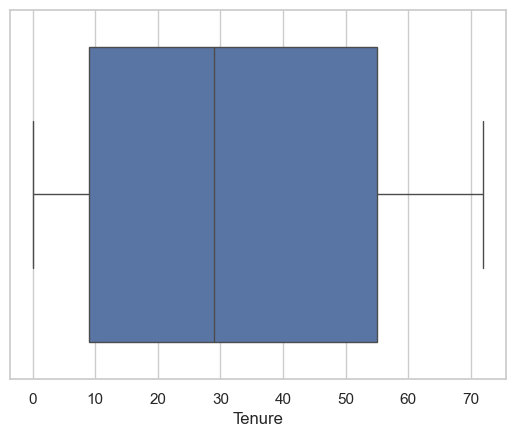

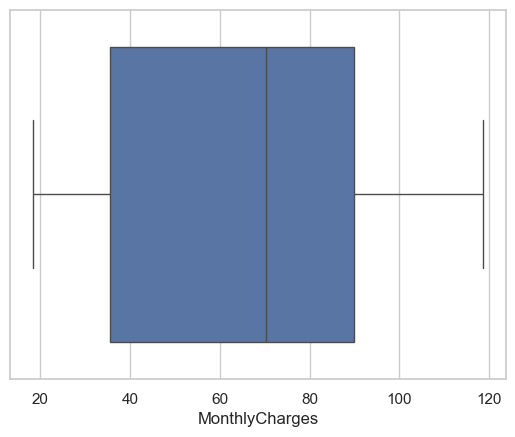

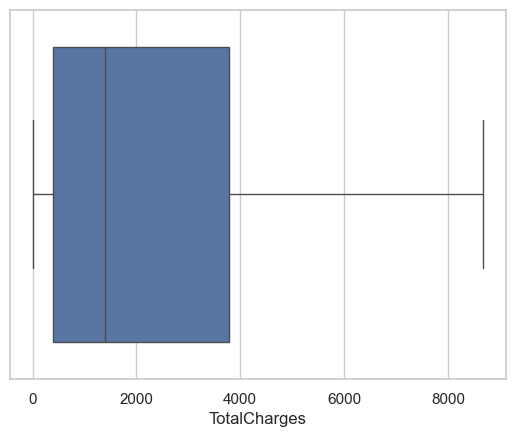

In [18]:
for i in num_cols:
    outlire_boxplot(df_cal,i)



Box plot graphs shows that none of the numerical columns have outliers.

In [19]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    fig , ax = plt.subplots()
    ax.bar(range(len(x)) , y , width = 0.75 , color=color , alpha = 0.6)
    plt.xticks(range(len(x)) ,x )

    plt.title(chart_title , fontsize = 14 )
    plt.xlabel(x_title , fontsize= 13 )
    plt.ylabel(y_title,fontsize = 13 )

    plt.yticks(fontsize = 0)
    plt.ylim(top = 1 )
    plt.grid(False)

    for spine in plt.gca().spines.values() :
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)


    for i , v in (enumerate(y)):
         ax.text(i, v+0.05, str(round((v*100),2))+'%', fontsize=13, ha='center')

    plt.show()
    


    


### Calculating Churn Rate 

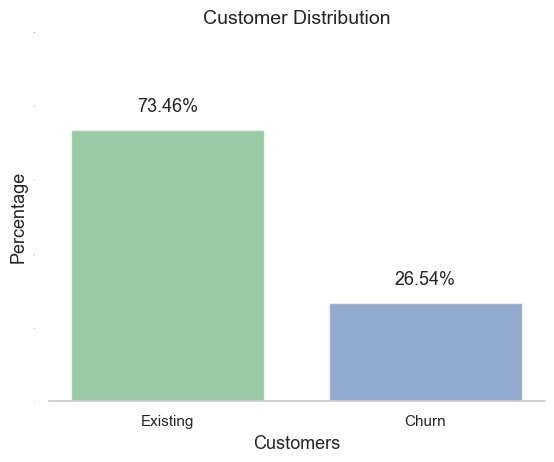

Churn
0    0.73463
1    0.26537
Name: count, dtype: float64


In [20]:
Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]
Generate_bar_graph(Churn_rate.index.map({0:'Existing',1:"Churn"})
                   , Churn_rate.values
                   , 'Customers'
                   , 'Percentage'
                   , 'Customer Distribution')

print(Churn_rate)

#### Churn rate of telecom company is around 26%, Meaning around 26% of the subscribers left the company during given interval.

In [21]:
def Generate_heatmap_graph(corr , chart_title , mask_uppertri= False) :
    # mask_uppertri: whether to hide the upper triangle of the heatmap (makes it cleaner).
    mask = np.zeros_like(corr)  # Creates a mask to hide the upper triangle of the correlation matrix.
    mask[np.triu_indices_from(mask)] = mask_uppertri # np.triu_indices_from gets the index of the upper triangle.


    fig , ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr # the matrix to plot.
                ,mask =mask  # hides the upper triangle if needed.
                ,square= True # makes each cell square.
                ,annot=True # shows numbers in each cell.
                ,annot_kws=({'size' : 10.5 , 'weight' : 'bold'}) # custom font size/boldness for the numbers.
                ,cmap=plt.get_cmap('YlOrBr') # sets color palette (Yellow–Orange–Brown).
                ,linewidths=0.1) # thin lines between boxes.

    
    plt.title(chart_title , fontsize = 14)
    plt.show()

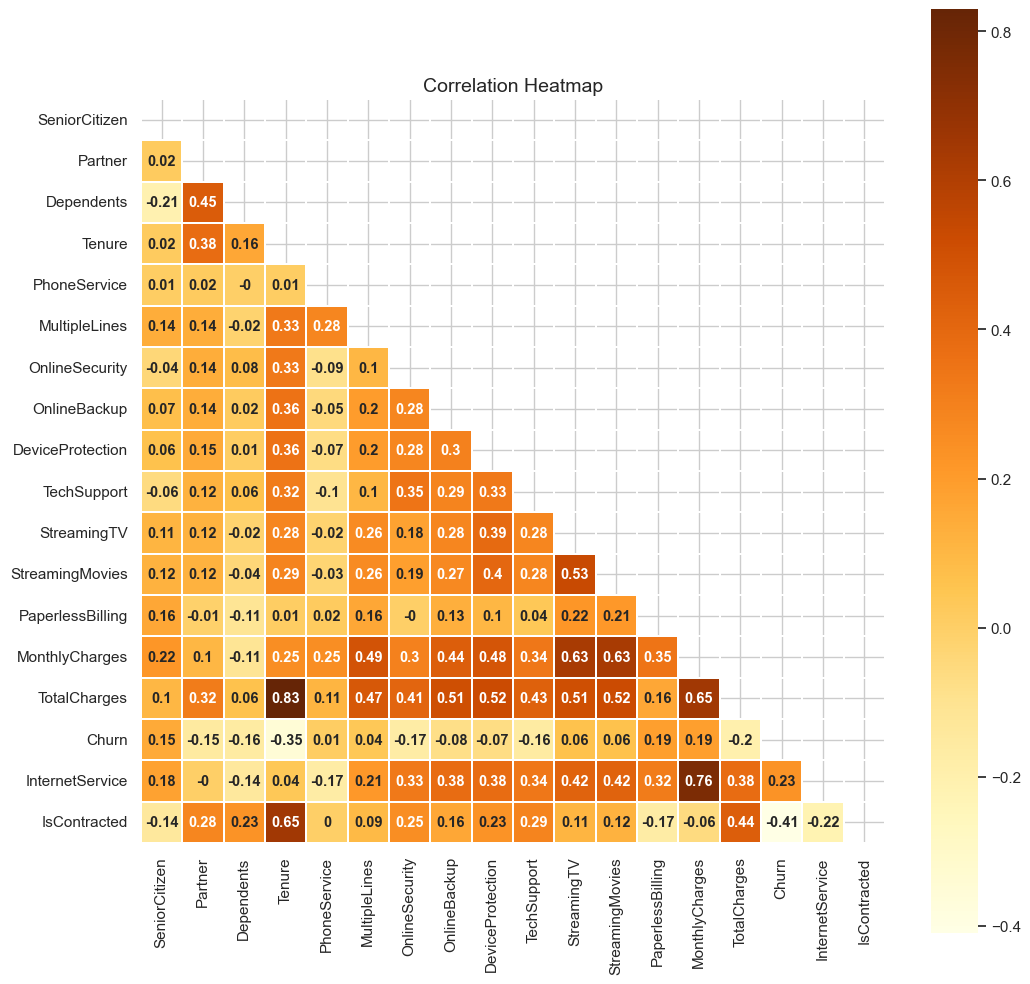

In [22]:
numerical_val = df_cal.select_dtypes(include= ['number'])
var_corr = round(numerical_val.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

From correlation matrix, features like Tenure, Monthly charges and Total charges are highly correlated with services like MultipleLines of phone services and Internet services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and Streaming Movies services.

## Distribution of features as per Churn

### Distribution of categorical and binary variables

In [23]:
#  This function is a helper that adds percentage labels on top of bars in a bar chart.
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches: # Loops over every bar (patch) in the chart.
            ax.text(bar.get_x() + bar.get_width()/ 2    # centers the label horizontally.
                    , bar.get_height() + 0.01   # positions it just above the bar
                    , str(round(100 * bar.get_height(),2)) + '%' # converts the bar height to a percentage with 2 decimals.
                    , ha = 'center' #  horizontally align text to the center.
                    , fontsize = 13)



#  This function draws bar charts of how categorical variables (like Gender, PaymentMethod, etc.) are distributed by churn status (or any other binary column).

def Categorical_var_churn_dist(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols): # Loop over all the categorical columns provided in cols.
        
        unique_vals=df_cal[feature].nunique() 
        palette_used = plotColor[:unique_vals]

        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')

        # creates a bar chart split by distribution_col
        plt_cat = sns.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col=distribution_col # creates one chart per value of the column 
                , kind='bar'
                , aspect = 0.8 # adjusts width of each subplot.
                , palette = palette_used # uses the custom color set
                ,hue=feature
                , alpha = 0.6 )# adds some transparency

        #Customize special case for PaymentMethod
                              
        if feature == 'PaymentMethod':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right') # For long names like in PaymentMethod, rotate the x-axis labels for better visibility.
        
        #  Add labels above bars
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)  # Calls the first function to add percentages on top of each bar in both subplots
            Create_data_label(ax2)
        
        
        plt.ylim(top=1)  # Limit y-axis from 0 to 1 (i.e., 0% to 100%).
        plt.subplots_adjust(top = 0.9) # Adjust subplot spacing.
        plt.gcf().suptitle(feature+" distribution",fontsize=14)  # Set the title of the entire figure to the current feature name.
    
    plt.show()
    
                           

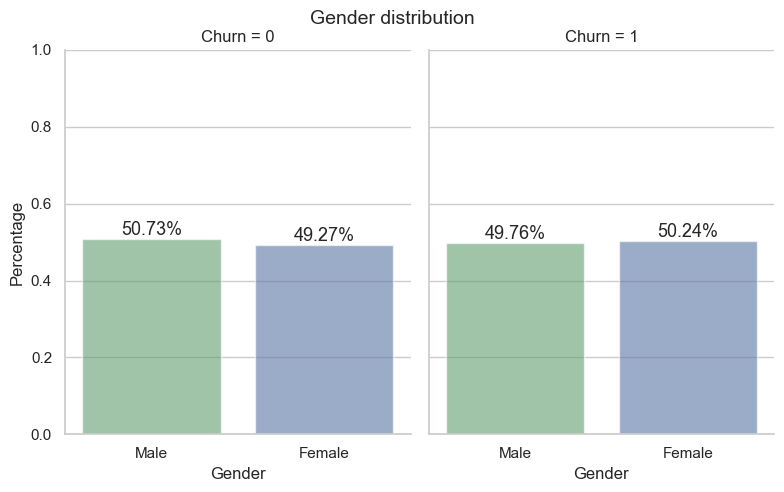

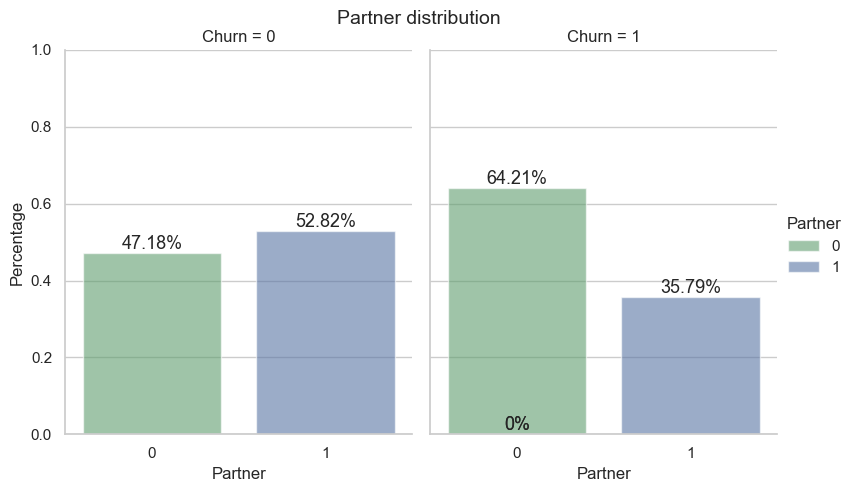

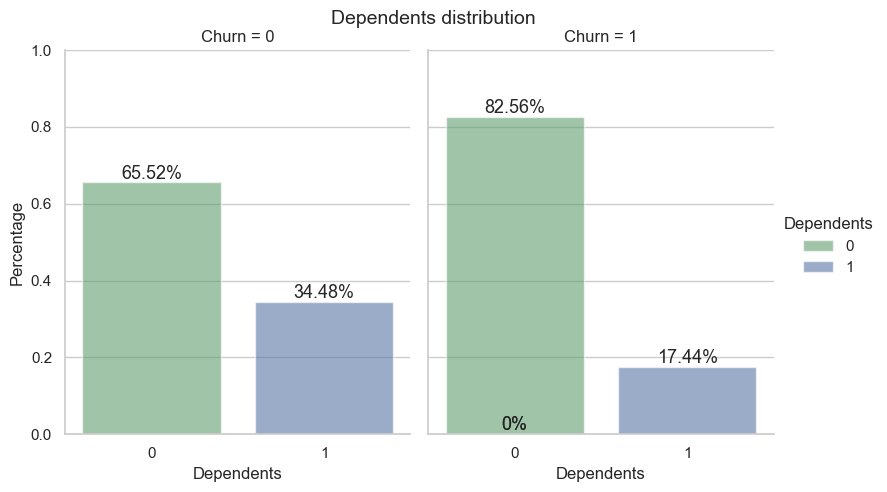

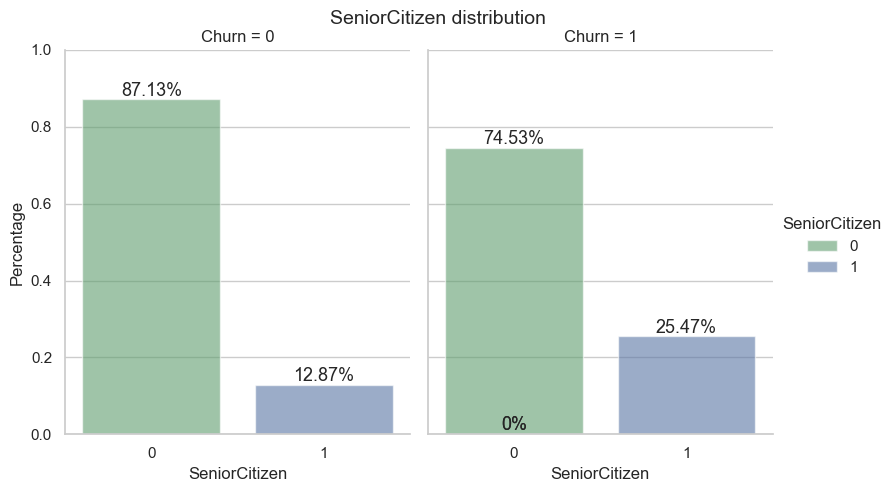

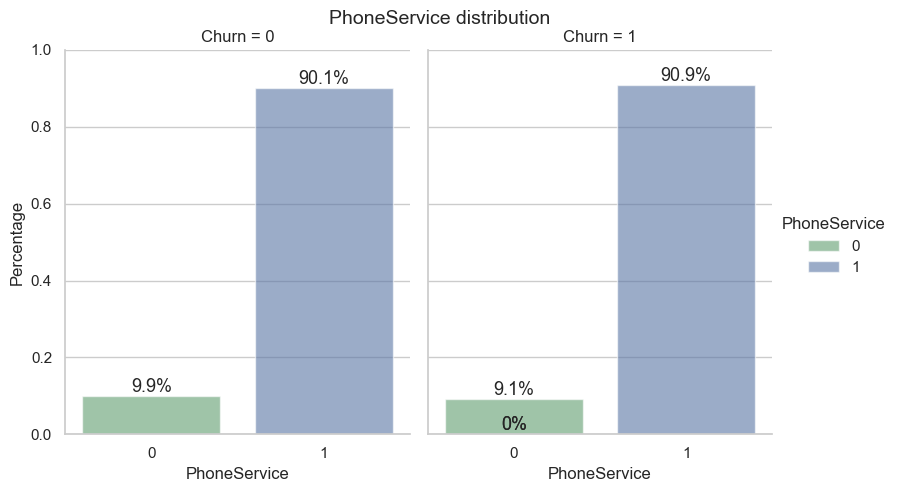

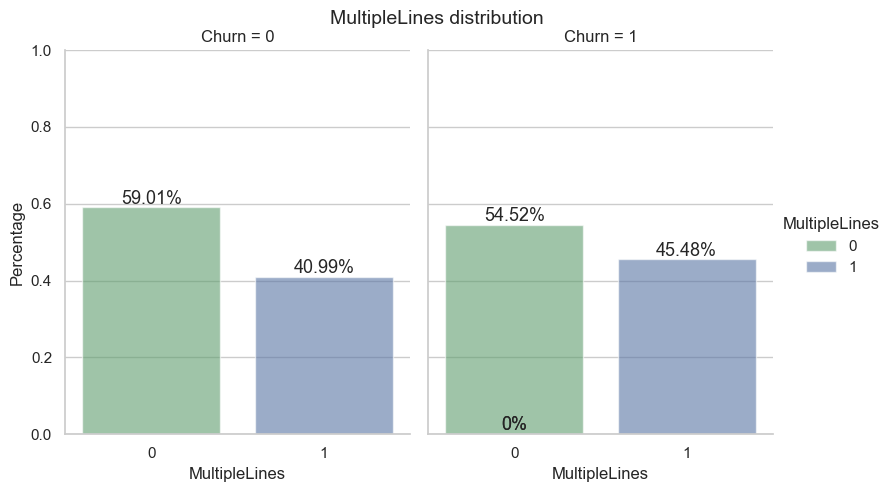

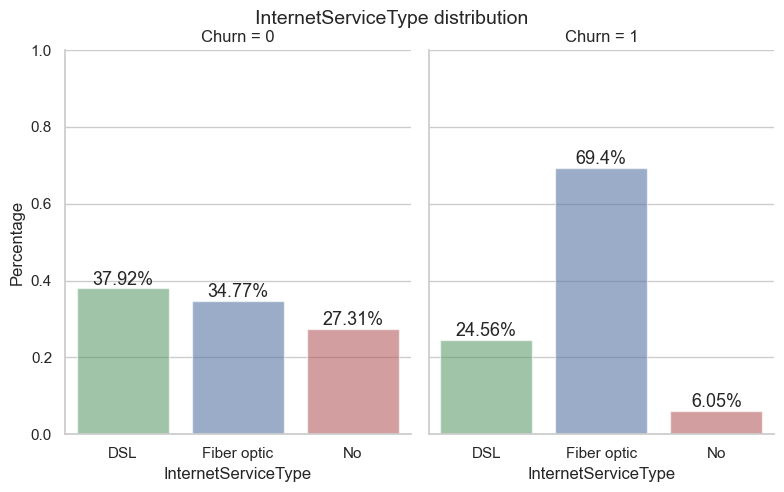

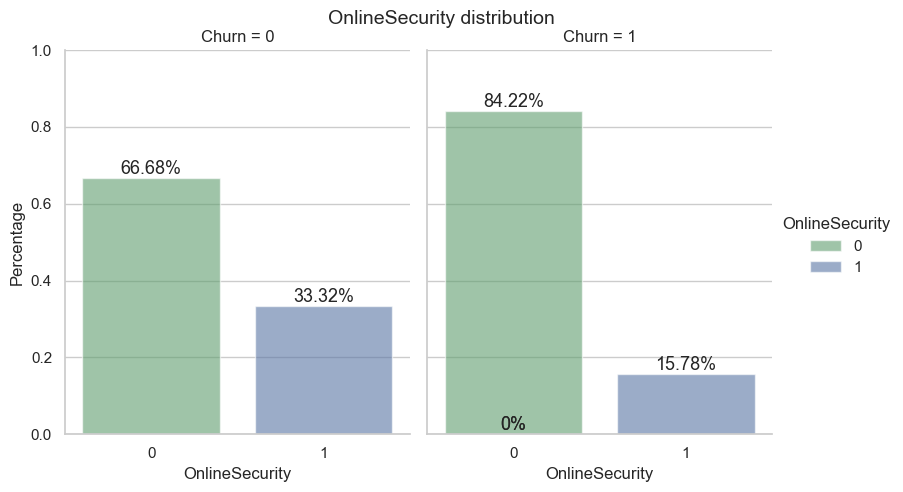

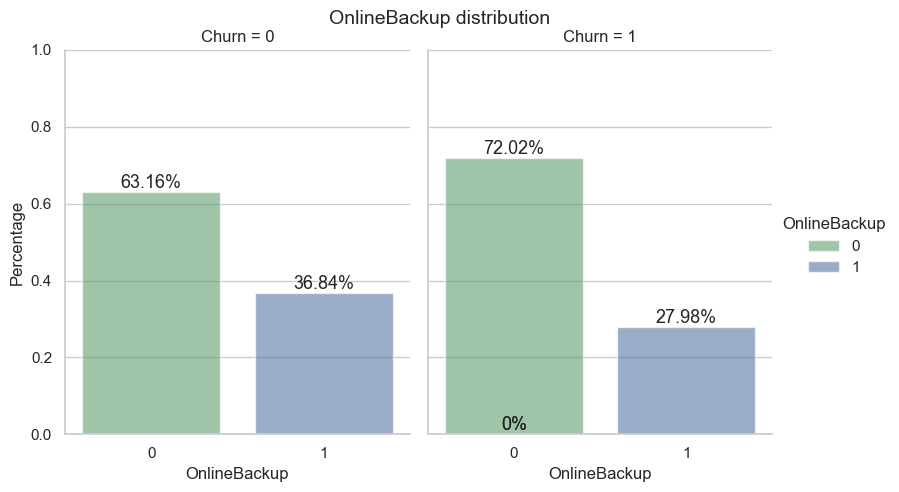

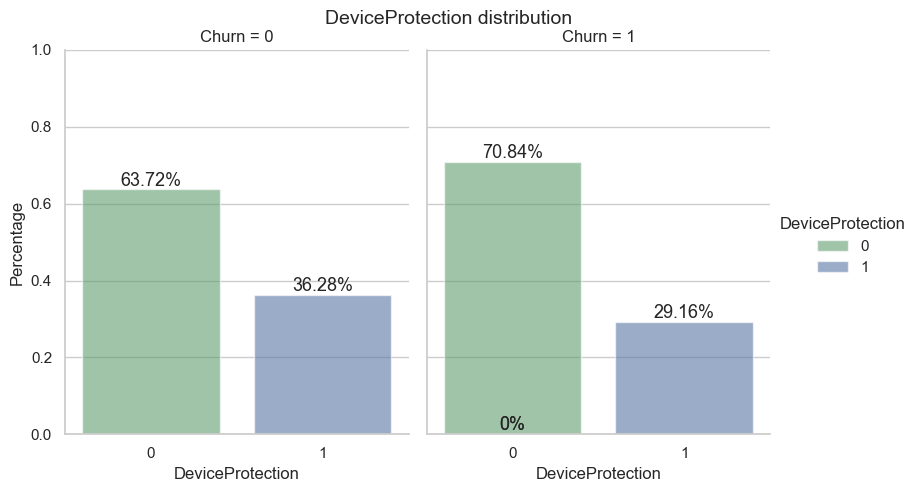

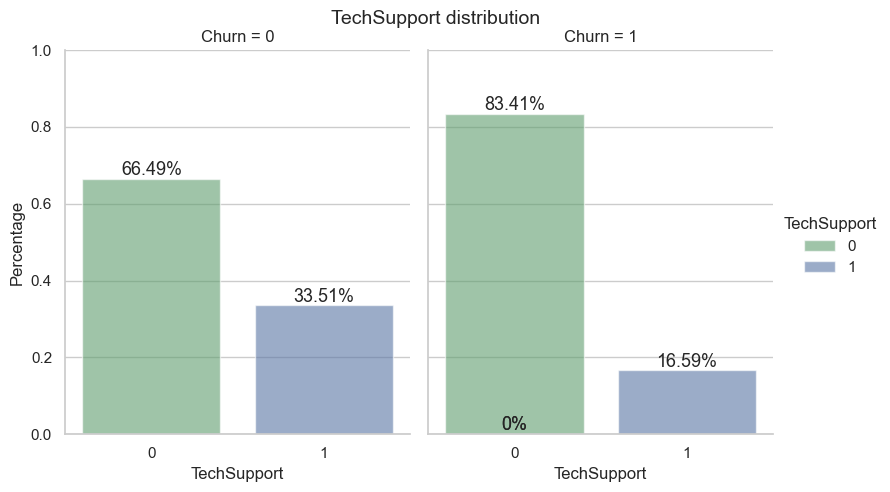

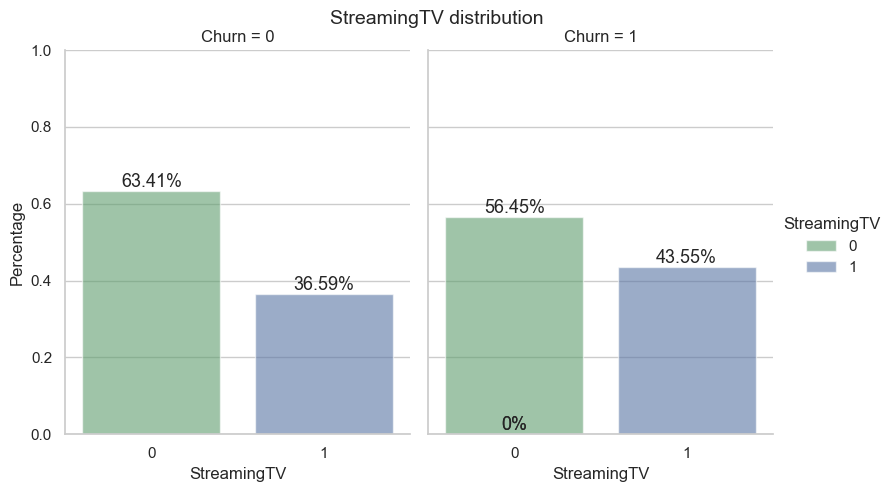

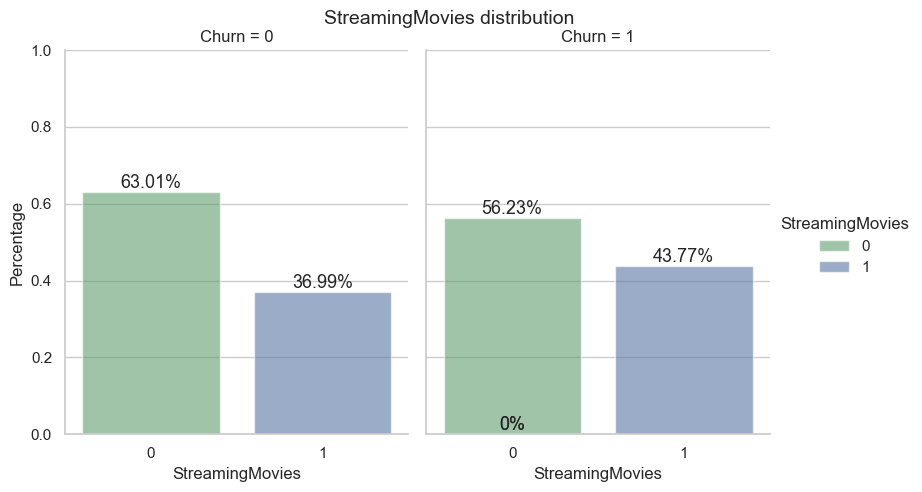

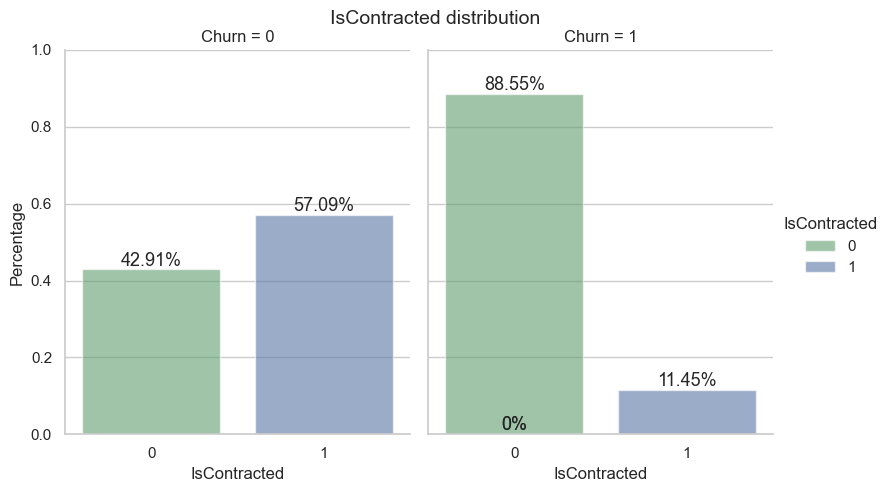

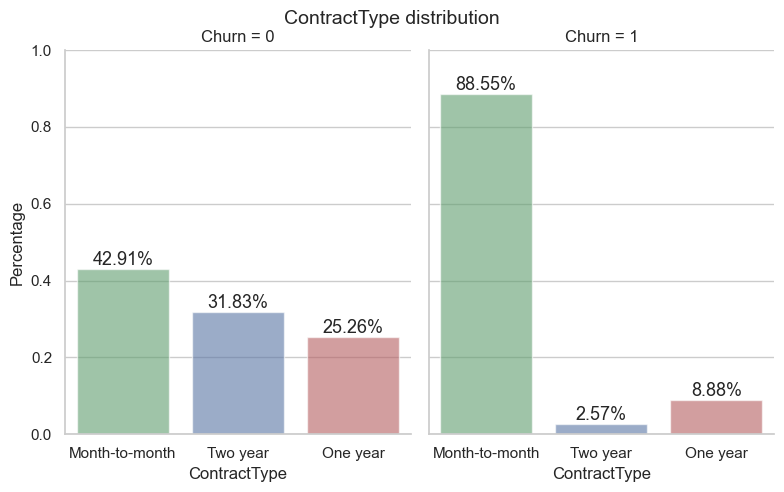

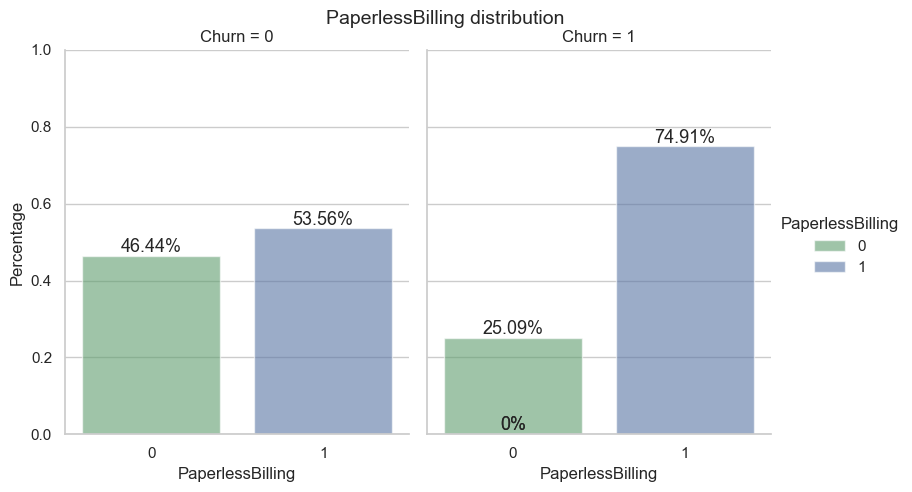

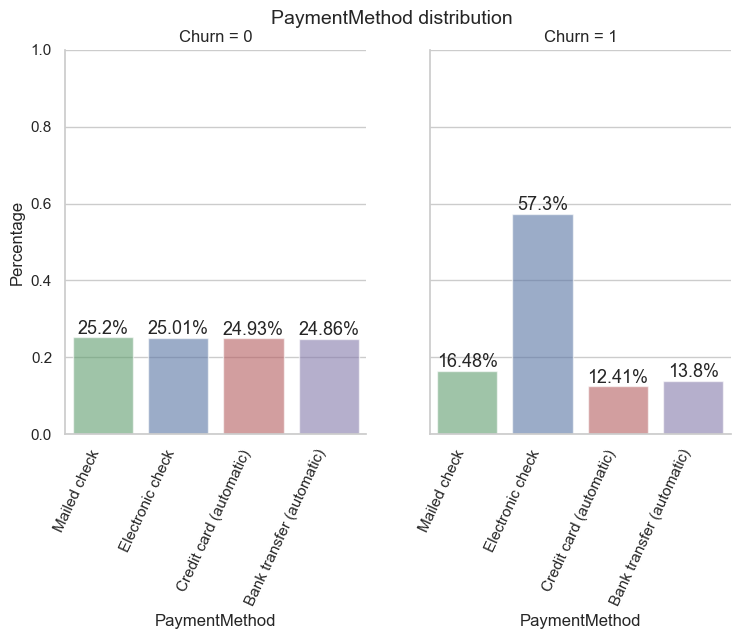

In [24]:
Churn_summary = df_cal.groupby('Churn')

Categorical_var_churn_dist(Churn_summary , cat_cols , 'Churn')

From above analysis, churn customers are likely to

- not have partners and Dependents; Means likely to be Single.
- have Internet service and specifically Fiber optics
- not have online security service, online backup service, device protection service, Tech support service
- have streaming TV and streaming Movies services
- be with monthly based contract
- have paperless billing service
- have electronic check payment method

### Distribution of Tenure, Monthly Charges and Total Charges

In [25]:
print(Churn_summary[num_cols].mean())

          Tenure  MonthlyCharges  TotalCharges
Churn                                         
0      37.569965       61.265124   2549.911442
1      17.979133       74.441332   1531.796094


Result shows that Churn customers have more Monthly charges compared to existing customers.
Also, there is a drastic difference in Tenure and Total Charges for Churn vs existing customers.

Let's check distribution of each features with target variable.

In [26]:
def numerical_distribution (df_cal , features):

    
    """ Distribution of numerical variable based on target variable"""
    for feature in features :
        plt.figure(figsize=(15,10))
        
        plt.subplot(2,1,1) 
        ax = sns.kdeplot(df_cal[feature]
                        ,color= 'g'
                        ,fill = True)

        title_str = 'Origin ' + feature + ' Distribution'
        plt.title(title_str)


        plt.subplot(2,1,2) 
        ax= sns.kdeplot(df_cal.loc[df_cal['Churn'] == 1 , feature]
                       ,color = 'g'
                       ,fill = True
                       ,label = 'Churn')
        sx = sns.kdeplot(df_cal.loc[df_cal['Churn'] == 0 , feature]
                        ,color = 'b'
                        ,fill= True
                        ,label = 'NO Churn')
        
        title_str = 'Distribution: Churn vs No churn'
        plt.title(title_str)
        plt.show()
        
    

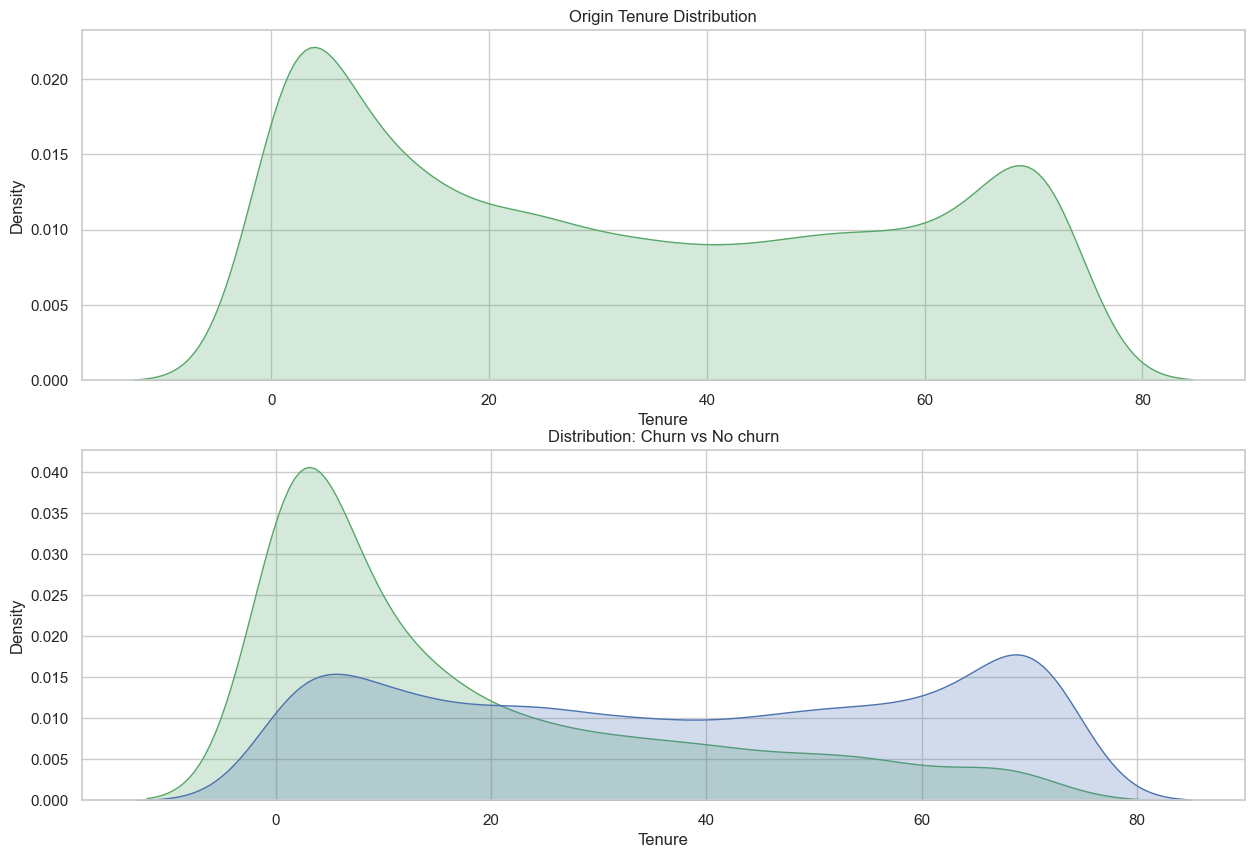

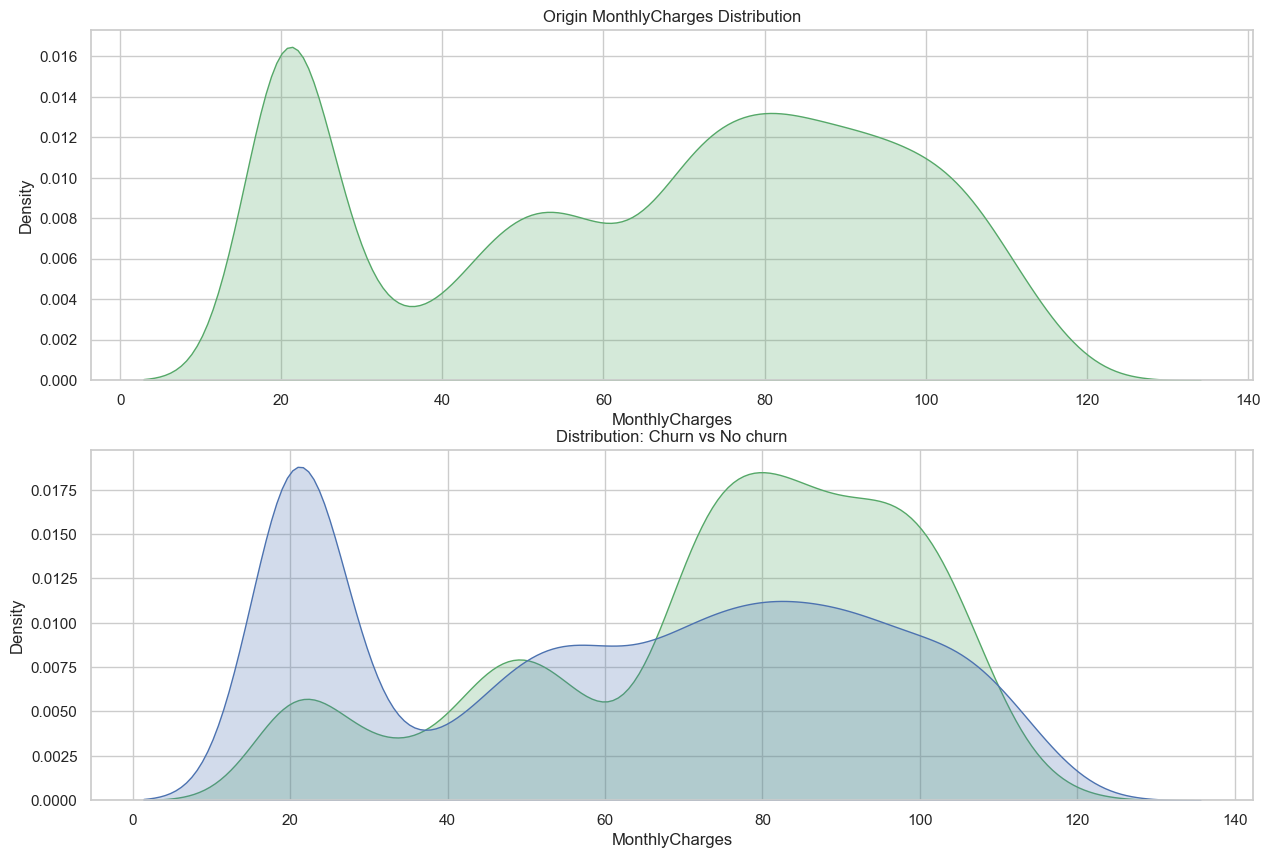

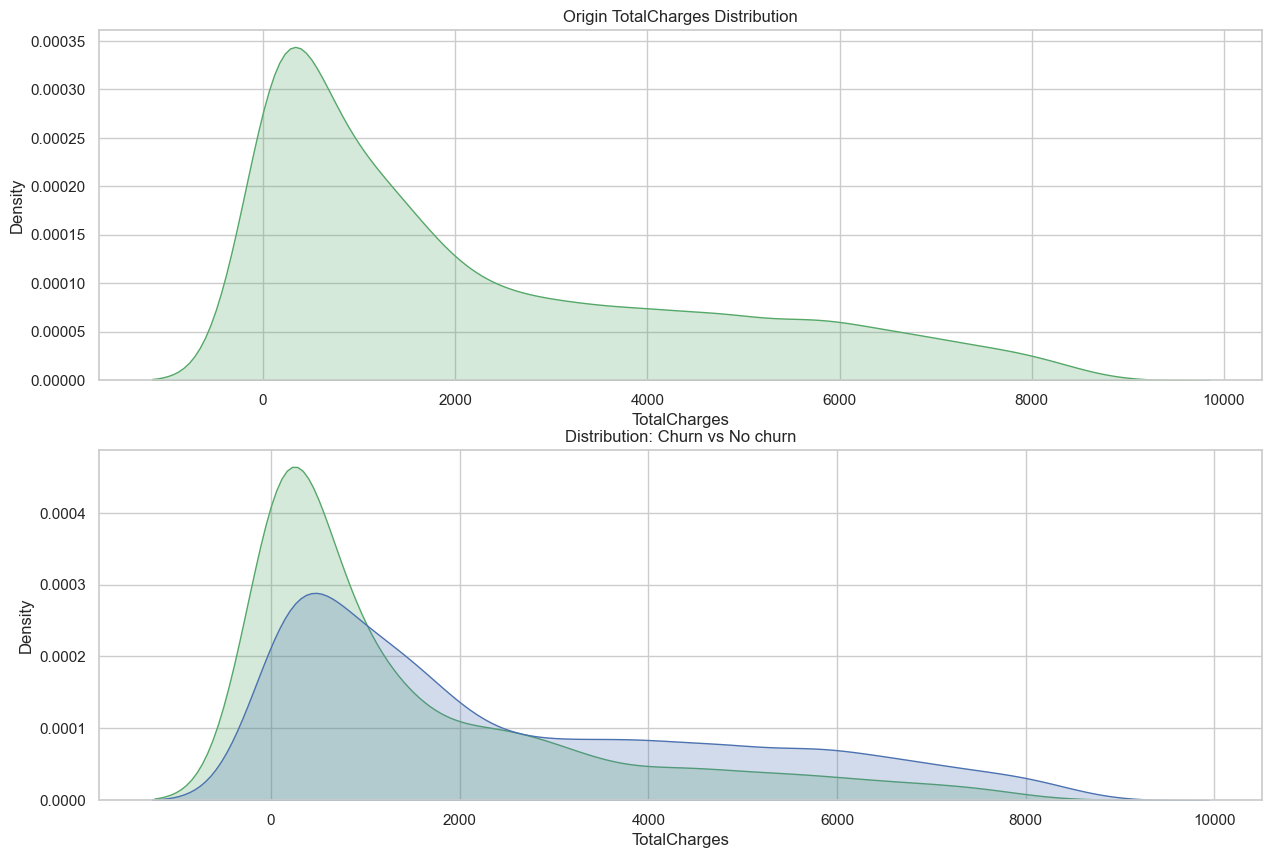

In [27]:
numerical_distribution(df_cal , num_cols)

From above distribution, churn subscribers are

more likely to leave company who's tenure is less than a year
more likely to have more than $65 monthly charges

# 3. Cluster Analysis

Let's check is there any relationship between Tenure and MonthlyCharges.

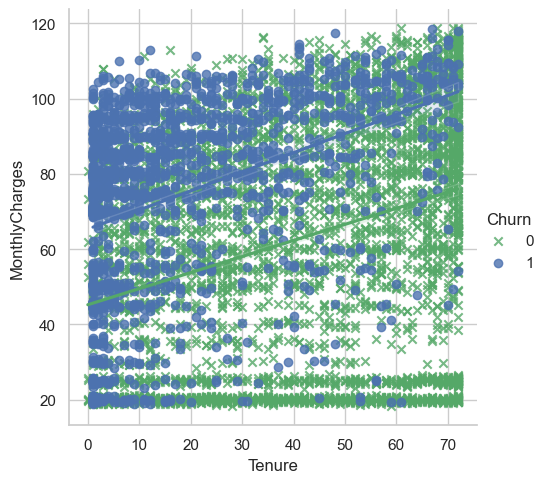

In [28]:
sns.lmplot(x= 'Tenure'
          ,y= 'MonthlyCharges'
          ,data= df_cal
          ,hue= 'Churn'
          ,markers= ['x' , 'o']
          ,palette = plotColor
          )
plt.show()

From the analysis, there are some clusters based on Tenure and Monthly Charges.

Let's apply K-means cluster algorithm to see clusters. Before passing data to K-means algo, need to normalize Tenure and Monthly Charges.

In [29]:
def Normalize_feature (feature):
    return prepro.StandardScaler().fit_transform(feature)
    

In [30]:
# normlize the tenure and the monthly charges 

df_cal['Tenure_norm'] = Normalize_feature(df_cal[['Tenure']])
df_cal['MonthlyCharges_norm'] = Normalize_feature(df_cal[['MonthlyCharges']])
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,Tenure_norm,MonthlyCharges_norm
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,-1.277445,-1.160323
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,One year,0,Mailed check,56.95,1889.50,0,1,1,0.066327,-0.259629
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,-1.236724,-0.362660
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0.514251,-0.746535
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,-1.236724,0.197365


In [31]:
def Create_elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data

    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]

    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()

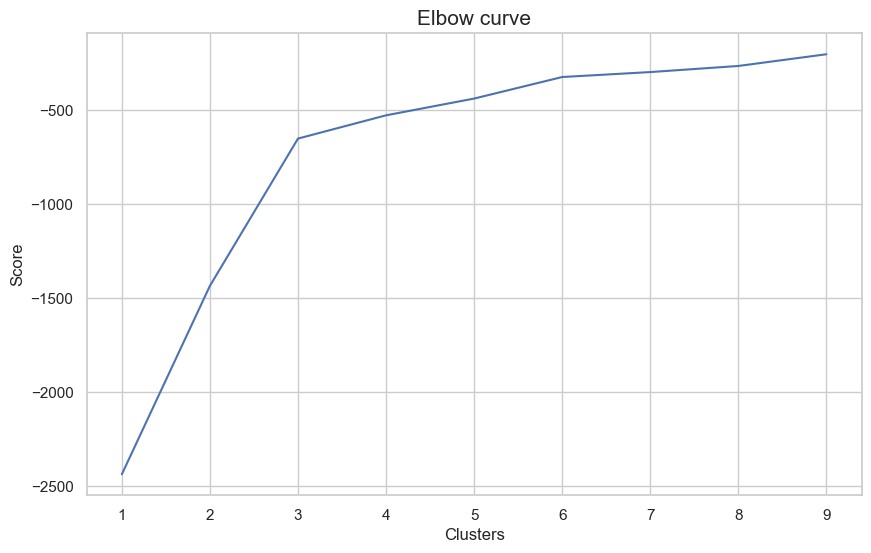

In [32]:
# checking number of clusters

Create_elbow_curve(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])

From Elbow curve, 3 seems most efficient.

In [33]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 

    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]


    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_cal[df_cal.Churn==1][[x_title+'_norm', y_title +'_norm']])

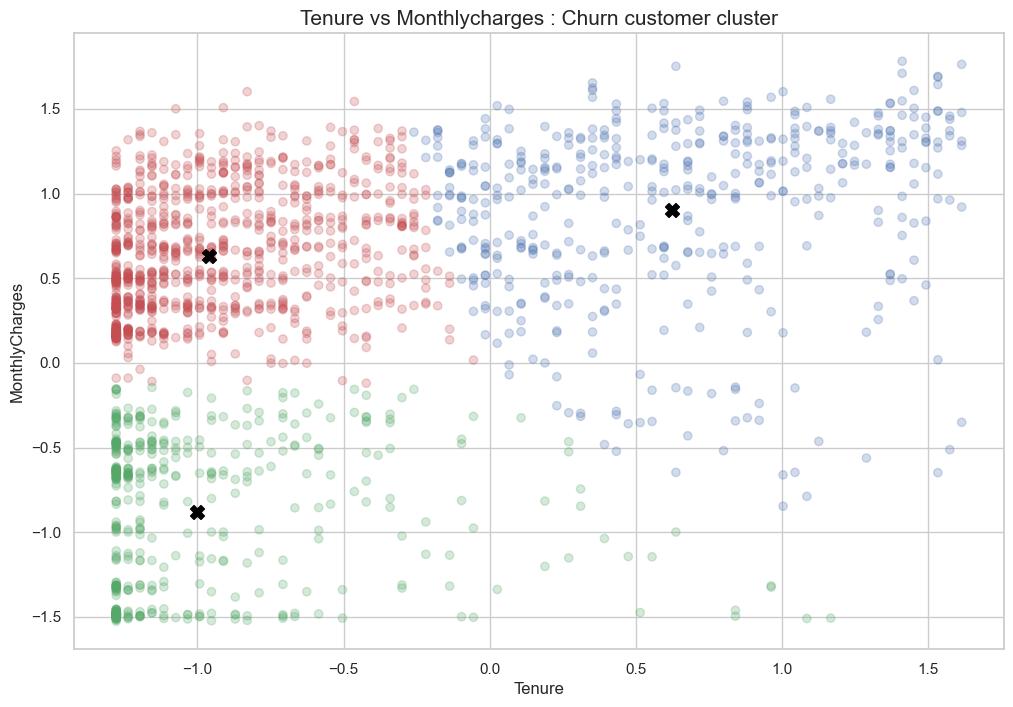

array([-1,  0,  2,  1])

In [34]:
df_cal['Cluster'] = -1 # by default set Cluster to -1
df_cal.loc[(df_cal.Churn==1),'Cluster'] = Create_kmeans_cluster_graph(df_cal
                            ,df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']]
                            ,3
                           ,'Tenure'
                           ,'MonthlyCharges'
                           ,"Tenure vs Monthlycharges : Churn customer cluster")

df_cal['Cluster'].unique()

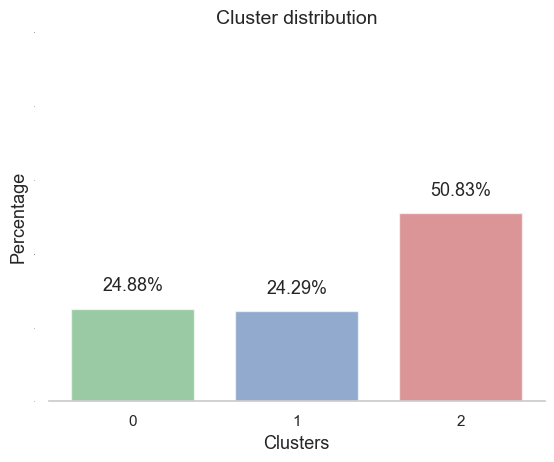

In [35]:
# Distribution of clusters
churn_distribution =  df_cal[df_cal['Churn']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= churn_distribution.index
                   , y = churn_distribution.values
                   , x_title = 'Clusters'
                   , y_title = 'Percentage'
                   , chart_title = 'Cluster distribution'
                  , color = plotColor)

Based on K-means cluster graph, we can see that there are three groups.

1. Low Tenure and High Monthly Charges (Red cluster)
2. High Tenure and High Monthly Charges (Blue cluster)
3. Low Tenure and Low Monthly Charges (Green cluster)

And From distribution graph shows that around 50% of the customers belong to cluster Low Tenure and High Monthly Charges.

Let's check there average Tenure and Monthly Charges by cluster.

In [37]:
df_cluster_gp = df_cal[df_cal['Churn']==1].groupby('Cluster')
print(df_cluster_gp[['Tenure','MonthlyCharges']].mean())

            Tenure  MonthlyCharges
Cluster                           
0         7.808602       38.329140
1        47.592511       91.855837
2         8.805263       83.795000


Based on demographic/usage/account related information, I have tried to explore characteristics of churn customer by each cluster.

For example, in overall churn customer, percentage of female is 50.2%. And in cluster 2 ( Low tenure and high monthly charges), percentage of female is 53.15%. Meaning female are more likely to leave company due to high monthly charges and lower tenure.

Using this technique, I have explored other variables too.

In [48]:
def Extract_highest_in_cluster(df_cal, df_cluster, feature, tenure_charges_cluster_df ):
    """ For each features, compare cluster's value with overall value 
    and find out highest distributed features for that cluster  """
    
    df = df_cal.copy()
    feature_churn_dist = df[(df['Churn']==1)][feature].value_counts(normalize=True).reset_index()
    feature_churn_dist.columns = [feature,'Percentage']
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Percentage']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    tenure_MonthlyCharges_df = df_cal[df_cal['Churn']==1].groupby(['Cluster',feature],as_index=False)[['Tenure','MonthlyCharges']].mean()
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
        for i, label in enumerate(feature_churn_dist[feature].unique()):
            cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Percentage']
            feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Percentage']
            
            if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
                if((feature_val.values[0] < cluster_val.values[0])):
                    
                    tenure_charges_cluster_df = pd.concat([
                        tenure_charges_cluster_df,pd.DataFrame({'Category':feature
                            , 'Label': ("Not have a "+ feature) if (df_cal[feature].dtypes == 'int64') & (label == 0) else (("Have a "+feature) if (df_cal[feature].dtypes == 'int64') & (label == 1) else label)
                            , 'Percentage': cluster_val.values[0]
                            , 'Cluster' : cluster
                            , 'Avg_Tenure': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['Tenure'].values[0],2)
                            , 'Avg_MonthlyCharges': round(tenure_MonthlyCharges_df[(tenure_MonthlyCharges_df['Cluster']==cluster) & (tenure_MonthlyCharges_df[feature]==label) ]['MonthlyCharges'].values[0],2)
                            , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                            , 'Label_in_graph' :  feature if (df_cal[feature].dtypes == 'int64') else label
                           }
                        , index = [len(tenure_charges_cluster_df)])
                                ])
                    
                    
                    
    return tenure_charges_cluster_df

In [49]:
tenure_charges_cluster_df = pd.DataFrame()

for feature in ['Gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetServiceType'
       ,'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','ContractType'
       ,'PaperlessBilling','PaymentMethod','InternetService']:
        tenure_charges_cluster_df = Extract_highest_in_cluster(df_cal, df_cluster_gp, feature,tenure_charges_cluster_df)

### Cluster 1 - Low Tenure and Low Monthly Charges

In [50]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==0]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
0,Gender,Male,0.535484,0,7.73,38.82,1,Male
3,SeniorCitizen,Not have a SeniorCitizen,0.862366,0,7.72,38.33,0,SeniorCitizen
6,Partner,Not have a Partner,0.752688,0,6.31,38.52,0,Partner
9,Dependents,Have a Dependents,0.197849,0,9.61,38.21,1,Dependents
12,PhoneService,Not have a PhoneService,0.318280,0,10.19,35.52,0,PhoneService
15,MultipleLines,Not have a MultipleLines,0.909677,0,7.31,37.50,0,MultipleLines
18,InternetServiceType,DSL,0.756989,0,7.67,44.10,1,DSL
19,InternetServiceType,No,0.243011,0,8.24,20.37,0,No
22,OnlineSecurity,Not have a OnlineSecurity,0.864516,0,7.32,36.76,0,OnlineSecurity
25,OnlineBackup,Not have a OnlineBackup,0.858065,0,7.16,37.12,0,OnlineBackup


### Cluster 2 - High Tenure and High Monthly Charges

In [51]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==1]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
1,Gender,Male,0.519824,1,49.25,92.21,1,Male
4,SeniorCitizen,Have a SeniorCitizen,0.332599,1,46.03,92.03,1,SeniorCitizen
7,Partner,Have a Partner,0.594714,1,49.23,92.24,1,Partner
10,Dependents,Have a Dependents,0.222467,1,48.75,90.94,1,Dependents
13,PhoneService,Have a PhoneService,0.951542,1,47.28,93.93,1,PhoneService
16,MultipleLines,Have a MultipleLines,0.748899,1,48.33,96.74,1,MultipleLines
20,InternetServiceType,Fiber optic,0.854626,1,47.16,96.70,1,Fiber optic
23,OnlineSecurity,Have a OnlineSecurity,0.286344,1,50.43,93.32,1,OnlineSecurity
26,OnlineBackup,Have a OnlineBackup,0.539648,1,50.72,94.15,1,OnlineBackup
29,DeviceProtection,Have a DeviceProtection,0.537445,1,49.98,96.36,1,DeviceProtection


### Cluster 3 - Low Tenure and High Monthly Charges

In [52]:
tenure_charges_cluster_df[tenure_charges_cluster_df['Cluster']==2]

,Category,Label,Percentage,Cluster,Avg_Tenure,Avg_MonthlyCharges,Represent_in_graph,Label_in_graph
2,Gender,Female,0.531579,2,8.47,83.47,1,Female
5,SeniorCitizen,Have a SeniorCitizen,0.274737,2,9.67,84.56,1,SeniorCitizen
8,Partner,Not have a Partner,0.701053,2,7.94,83.28,0,Partner
11,Dependents,Not have a Dependents,0.860000,2,8.56,83.91,0,Dependents
14,PhoneService,Have a PhoneService,1.000000,2,8.81,83.80,1,PhoneService
17,MultipleLines,Have a MultipleLines,0.492632,2,10.57,87.30,1,MultipleLines
21,InternetServiceType,Fiber optic,0.956842,2,8.69,84.47,1,Fiber optic
24,OnlineSecurity,Not have a OnlineSecurity,0.892632,2,8.30,83.39,0,OnlineSecurity
27,OnlineBackup,Not have a OnlineBackup,0.776842,2,7.94,82.29,0,OnlineBackup
30,DeviceProtection,Not have a DeviceProtection,0.749474,2,8.07,81.48,0,DeviceProtection
